Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/200 mT_116 ms_slice_1.tif
SNR: 20.9592346886109, CNR: 8.845076837667424
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_200mT.tiff
SNR: 0.9534008641880332, CNR: -0.052231168021410826
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/200 mT_116 ms_slice_1.tif
SNR: 22.951980590820312, CNR: 14.637989044189453


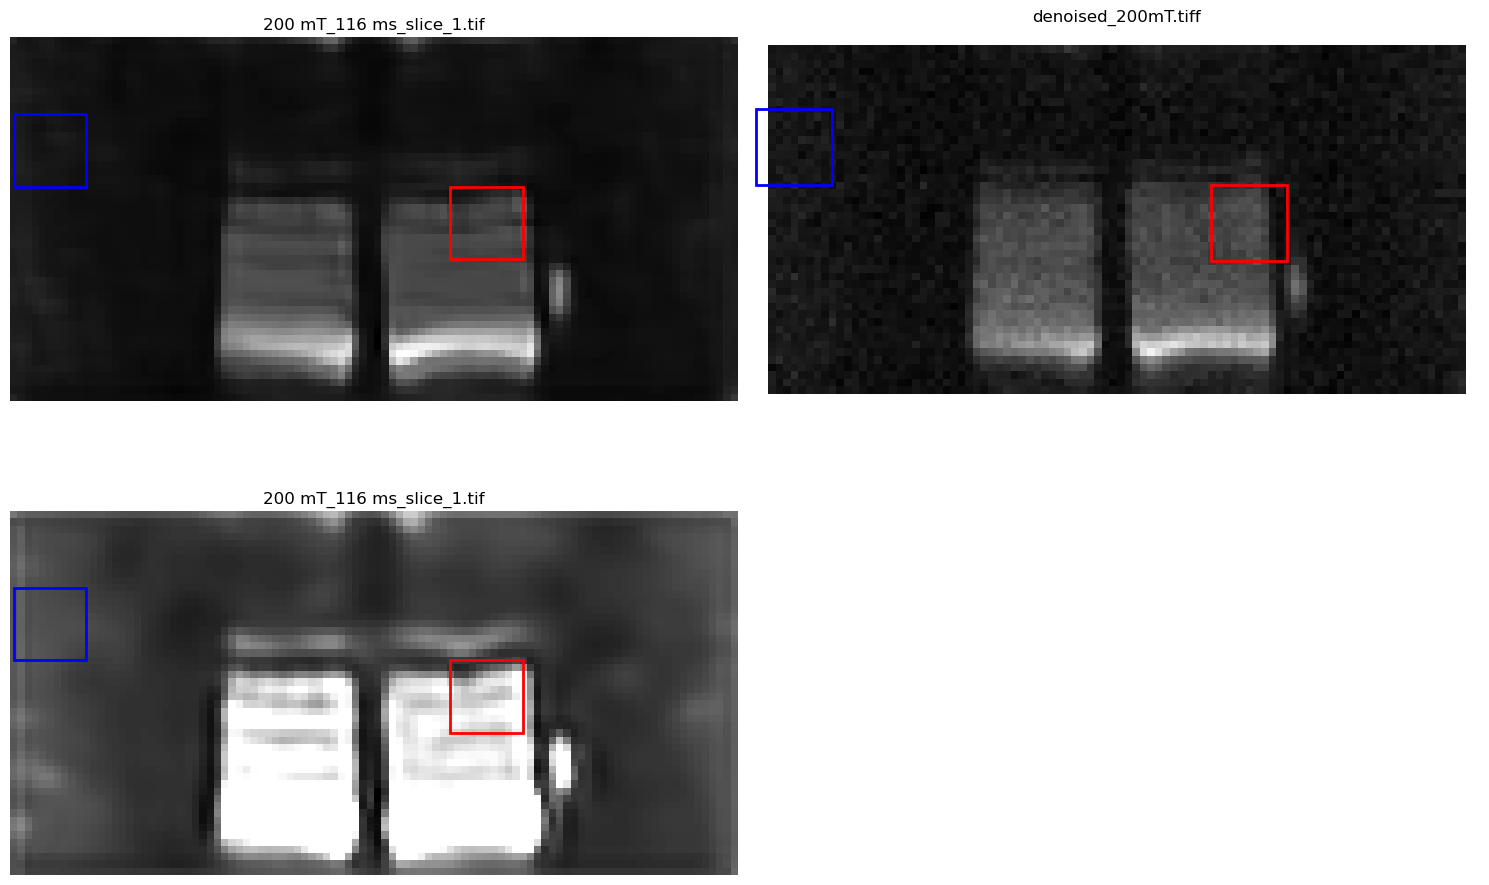

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr
def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        
        # Check if the image is grayscale or multichannel
        if image.ndim == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image[:, :, 0], cmap='gray')
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/200 mT_116 ms_slice_1.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_200mT.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/200 mT_116 ms_slice_1.tif']
    


roi_coords = (60, 20, 10, 10)
noise_coords = (0, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)



Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/20 mT_123 ms_slice_1.tif
SNR: 26.226215939699024, CNR: 13.557216857851673
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_20mTML.tiff
SNR: 0.9625915819743466, CNR: -0.05669399041703544
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/20 mT_123 ms_slice_1.tif
SNR: 17.931249618530273, CNR: 12.139695167541504


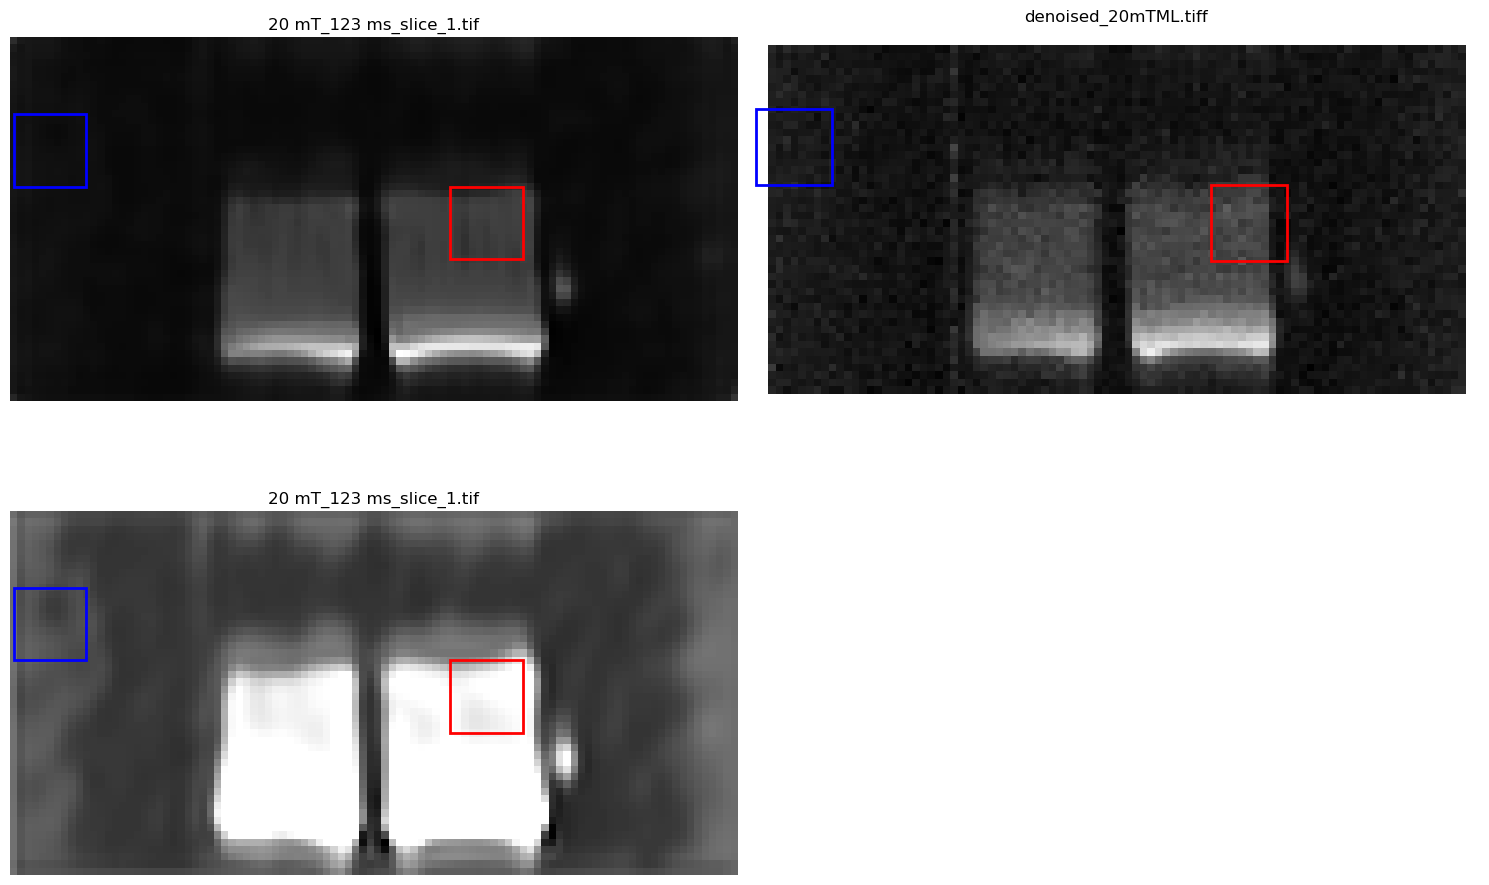

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr
def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        
        # Check if the image is grayscale or multichannel
        if image.ndim == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image[:, :, 0], cmap='gray')
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/20 mT_123 ms_slice_1.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_20mTML.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/20 mT_123 ms_slice_1.tif']
    


roi_coords = (60, 20, 10, 10)
noise_coords = (0, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)


Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/2 mT_131 ms_slice_1.tif
SNR: 23.168765776259832, CNR: 10.77976624861501
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/2mTML.tiff
SNR: 1.076450133669195, CNR: -0.017933857406520447
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/2 mT_131 ms_slice_1.tif
SNR: 19.36670684814453, CNR: 12.319684028625488


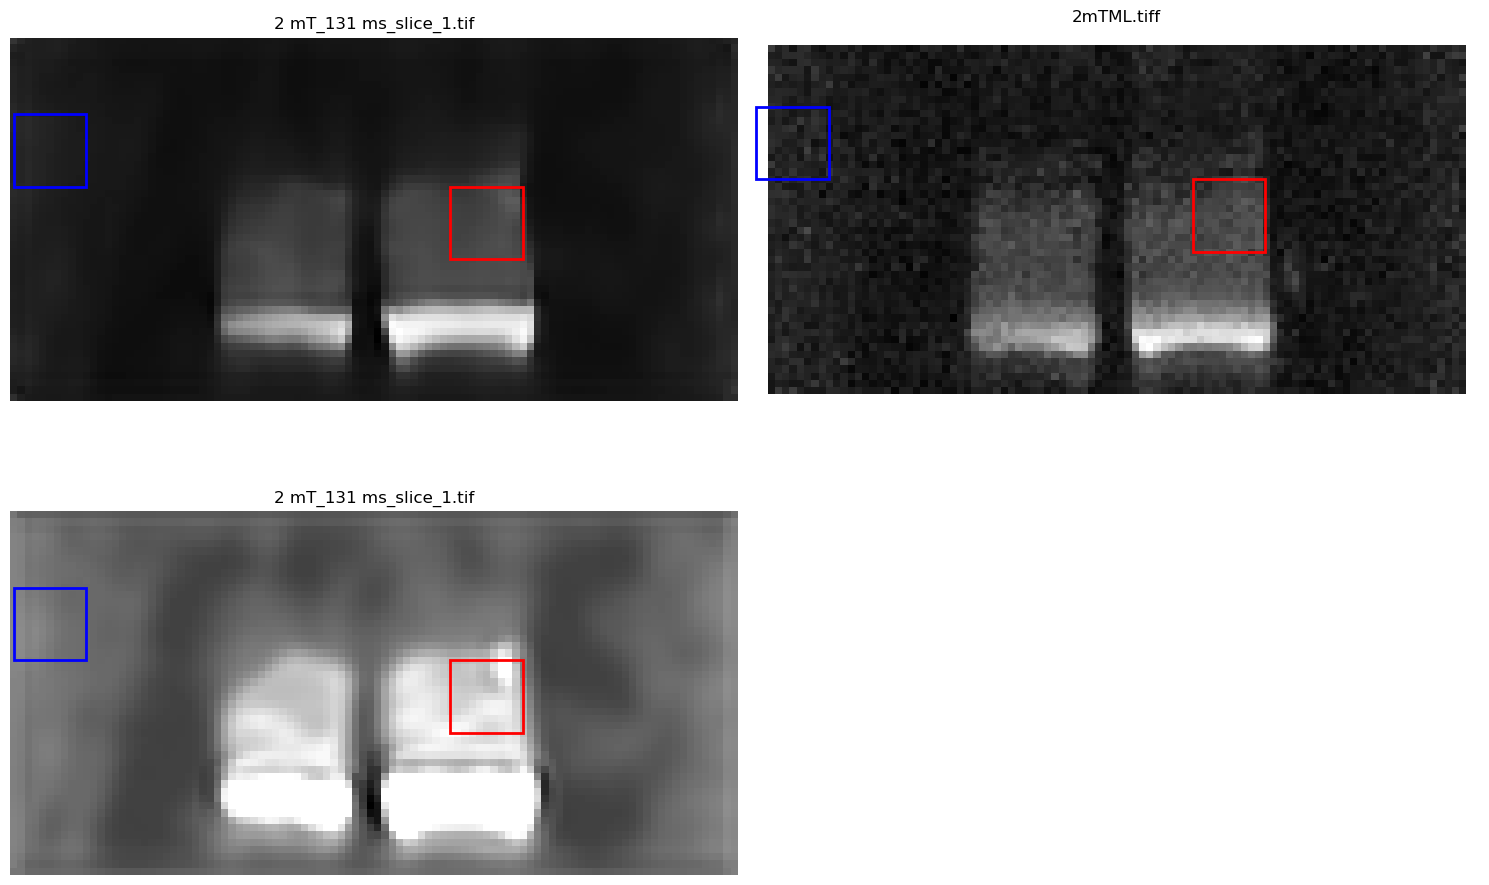

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr
def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        
        # Check if the image is grayscale or multichannel
        if image.ndim == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image[:, :, 0], cmap='gray')
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/2 mT_131 ms_slice_1.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/2mTML.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/2 mT_131 ms_slice_1.tif']
    


roi_coords = (60, 20, 10, 10)
noise_coords = (0, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/0 mT_18 ms_slice_1.tif
SNR: 30.231410242173837, CNR: 16.8666858695855
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_ML_0mT.tiff
SNR: 1.19346618325758, CNR: 0.00036386164123701194
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/0 mT_18 ms_slice_1.tif
SNR: 27.78314971923828, CNR: 18.799694061279297


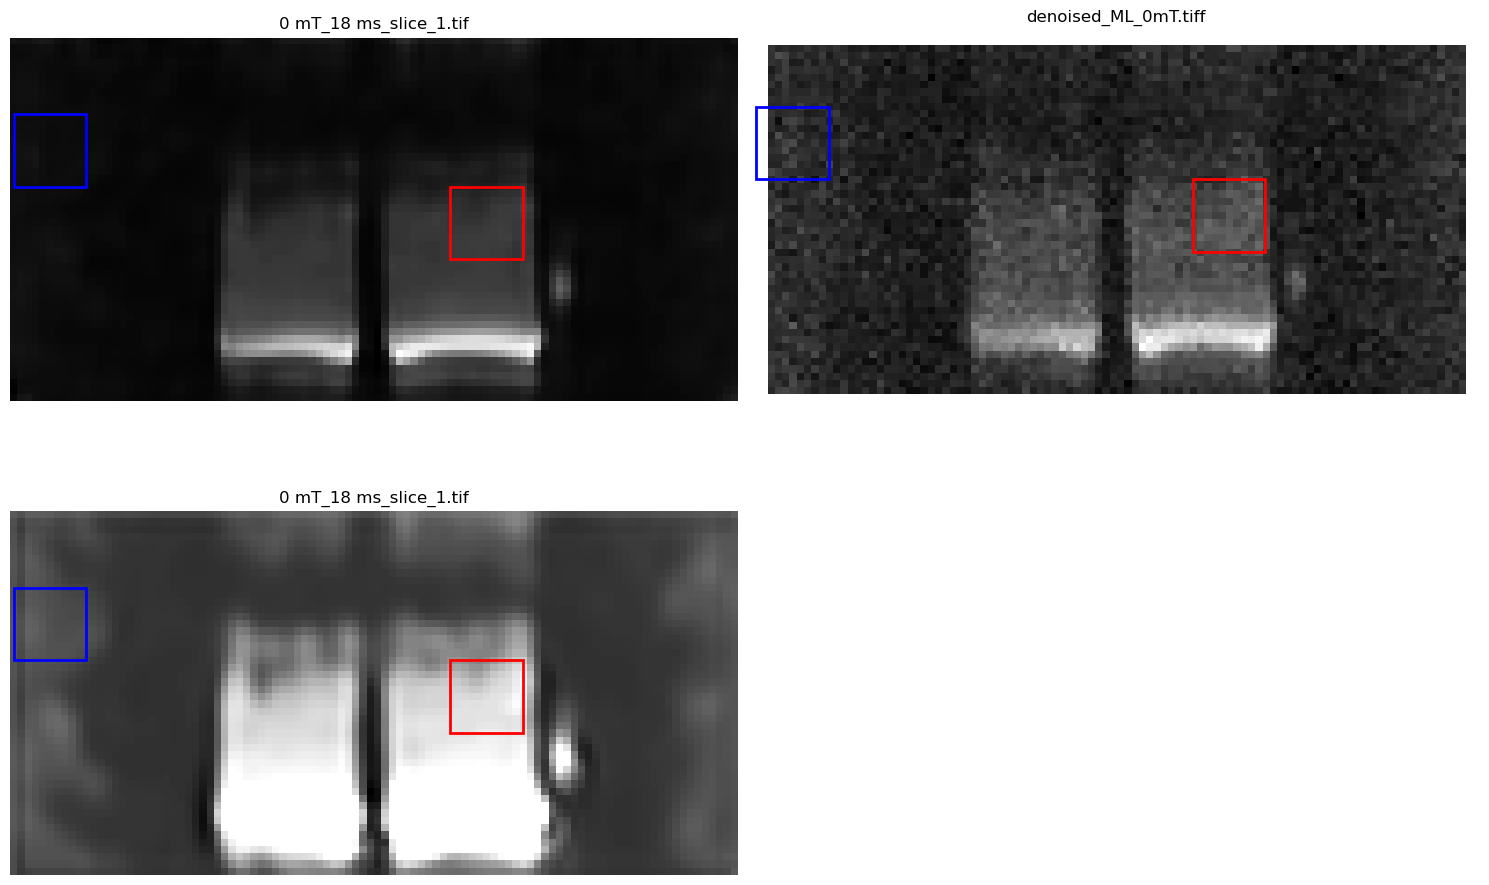

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr
def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        
        # Check if the image is grayscale or multichannel
        if image.ndim == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image[:, :, 0], cmap='gray')
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/0 mT_18 ms_slice_1.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_ML_0mT.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/0 mT_18 ms_slice_1.tif']
    


roi_coords = (60, 20, 10, 10)
noise_coords = (0, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)